In [1]:
from rbibm.utils.utils_data import query

from rbibm.utils.utils_data import query, query_main, remove_entry_by_id, query_rob_metric, get_model_by_idx, get_adversarial_examples_by_id, get_model_by_id
from rbibm.plots.multi_plots import multi_plot
from rbibm.plots.metric_plots import plot_by_num_simulations, plot_expected_coverage, plot_approximation_metric, plot_rob_tolerance_plot
from rbibm.plots.sweep_plots import plot_mulitobjective_paretto_front
from rbibm.plots.main_plots import plot_posterior, plot_adversarial_posterior, plot_posterior_predictive, plot_adversarial_posterior_predictive
from rbibm.plots.styles import use_style

import matplotlib.pyplot as plt 

In [2]:
import torch
torch.manual_seed(0)

In [3]:
name = "super_final_benchmark"

In [4]:
df = query(name, metric_approx="MeanDiff", defense="None", N_train=100000)

b'Skipping line 1842: expected 18 fields, saw 35\n'


In [5]:
from rbibm.tasks import SIRTask, LotkaVolterraTask, HHTask, SpatialSIRTask, VAETask, GaussianLinearTask

tasks = ["gaussian_linear", "sir", "lotka_volterra", "hudgkin_huxley", "vae_task", "spatial_sir"]
task_classes = [GaussianLinearTask(likelihood_scale=0.1), SIRTask(observation_noise=0.2), LotkaVolterraTask(prior_scale=0.5),HHTask(observation_noise=0.5), VAETask(latent_dim=3), SpatialSIRTask(N_grid=30, T=10)]

b'Skipping line 1842: expected 18 fields, saw 35\n'


['gaussian']
['multivariate_gaussian']
['mixture_gaussian']
['maf']
['nsf']


/mnt/qb/work/ / /miniconda3/envs/rbi/lib/python3.9/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


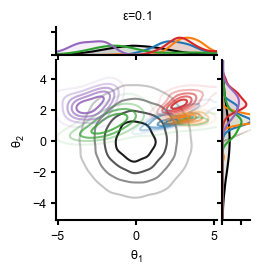

b'Skipping line 1842: expected 18 fields, saw 35\n'


['gaussian']
['multivariate_gaussian']
['mixture_gaussian']
['maf']
['nsf']


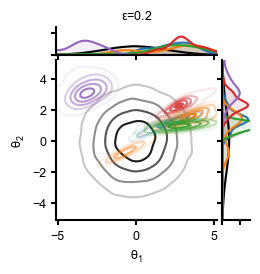

b'Skipping line 1842: expected 18 fields, saw 35\n'


['gaussian']
['multivariate_gaussian']
['mixture_gaussian']
['maf']
['nsf']


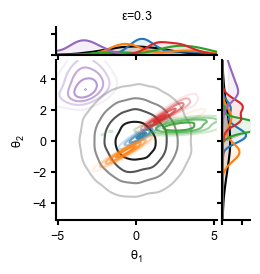

b'Skipping line 1842: expected 18 fields, saw 35\n'


['gaussian']
['multivariate_gaussian']
['mixture_gaussian']
['maf']
['nsf']


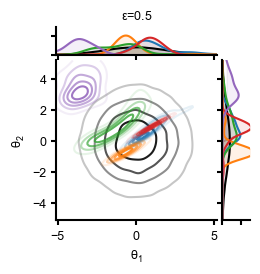

b'Skipping line 1842: expected 18 fields, saw 35\n'


['gaussian']
['multivariate_gaussian']
['mixture_gaussian']
['maf']
['nsf']


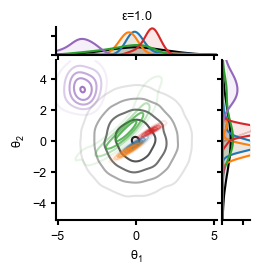

b'Skipping line 1842: expected 18 fields, saw 35\n'


['gaussian']
['multivariate_gaussian']
['mixture_gaussian']
['maf']
['nsf']


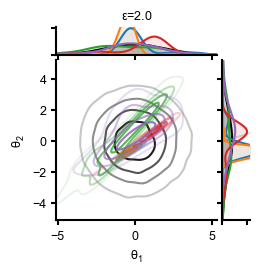

In [6]:
from rbibm.utils.utils_data import get_adversarial_examples_by_id
from rbibm.tasks import SIRTask, LotkaVolterraTask, VAETask, SpatialSIRTask, HHTask
from rbibm.plots.custom_distribution_plots import custom_2d_joint_plot,custom_pairplot
from rbibm.plots.multi_plots import get_sorting_key_fn

for eps in [0.1,0.2,0.3,0.5,1.,2.]:
    df = query(name, defense="None", eps=eps, task="sir", N_train=100000, metric_rob="ReverseKLRobMetric", attack="L2PGDAttack")
    prior = task_classes[1].get_prior()
    df = df.sort_values("model_name", key=get_sorting_key_fn("model_name"))
    theta_prior = prior.sample((100000,))
    samples = [theta_prior.squeeze()]
    for m in df.id_adversarial.unique():
        print(df[df.id_adversarial == m].model_name.unique())
        xs, thetas, xs_tilde = get_adversarial_examples_by_id(name, m)
        samples.append(thetas.squeeze()[:50])


    with use_style("pyloric"):
        fig,axes = custom_2d_joint_plot(samples, colors=["black", "C0","C1","C2", "C3", "C4"], figsize=(2.5,2.5), labels=[r"$\theta_1$", r"$\theta_2$"])
        axes[1].set_title(rf"$\epsilon$={eps}")
        fig.savefig(f"sir_adversarial_thetas_eps_{eps}.svg")
        plt.show()
    

b'Skipping line 1842: expected 18 fields, saw 35\n'


['gaussian']
['multivariate_gaussian']
['mixture_gaussian']
['maf']
['nsf']


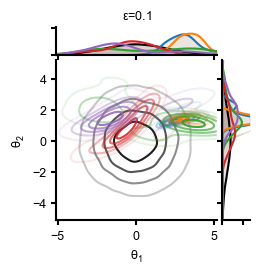

b'Skipping line 1842: expected 18 fields, saw 35\n'


['gaussian']
['multivariate_gaussian']
['mixture_gaussian']
['maf']
['nsf']


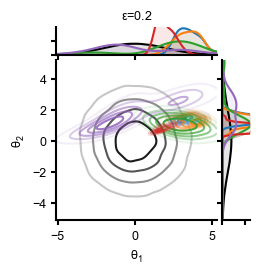

b'Skipping line 1842: expected 18 fields, saw 35\n'


['gaussian']
['multivariate_gaussian']
['mixture_gaussian']
['maf']
['nsf']


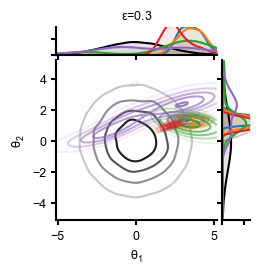

b'Skipping line 1842: expected 18 fields, saw 35\n'


['gaussian']
['multivariate_gaussian']
['mixture_gaussian']
['maf']
['nsf']


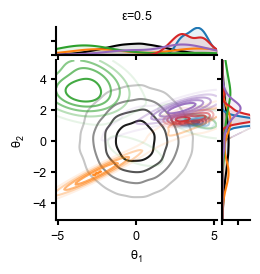

b'Skipping line 1842: expected 18 fields, saw 35\n'


['gaussian']
['multivariate_gaussian']
['mixture_gaussian']
['maf']
['nsf']


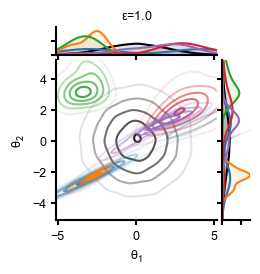

b'Skipping line 1842: expected 18 fields, saw 35\n'


['gaussian']
['multivariate_gaussian']
['mixture_gaussian']
['maf']
['nsf']


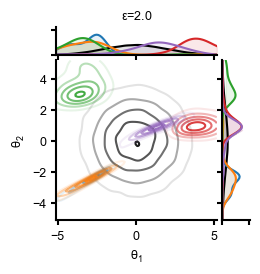

In [7]:
from rbibm.utils.utils_data import get_adversarial_examples_by_id
from rbibm.tasks import SIRTask, LotkaVolterraTask, VAETask, SpatialSIRTask, HHTask
from rbibm.plots.custom_distribution_plots import custom_2d_joint_plot,custom_pairplot
from rbibm.plots.multi_plots import get_sorting_key_fn

for eps in [0.1,0.2,0.3,0.5,1.,2.]:
    df = query(name, defense="None", eps=eps, task="sir", N_train=100000, metric_rob="ForwardKLRobMetric", attack="L2PGDAttack")
    prior = task_classes[1].get_prior()
    df = df.sort_values("model_name", key=get_sorting_key_fn("model_name"))
    theta_prior = prior.sample((100000,))
    samples = [theta_prior.squeeze()]
    for m in df.id_adversarial.unique():
        print(df[df.id_adversarial == m].model_name.unique())
        xs, thetas, xs_tilde = get_adversarial_examples_by_id(name, m)
        samples.append(thetas.squeeze()[:50])


    with use_style("pyloric"):
        fig,axes = custom_2d_joint_plot(samples, colors=["black", "C0","C1","C2", "C3", "C4"], figsize=(2.5,2.5), labels=[r"$\theta_1$", r"$\theta_2$"])
        axes[1].set_title(rf"$\epsilon$={eps}")
        fig.savefig(f"sir_adversarial_thetas_eps_{eps}_fKL.svg")
        plt.show()
    